# pemodelan harga Saham dengan metode Tree Regression dan 

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime as dt
from datetime import timedelta
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#variabel
kode_saham="BBCA.JK"
data_api="yahoo"
mulai=dt.datetime(2020,1,1)
if dt.datetime.today().weekday()==5 :
    akhir=dt.datetime.today()- timedelta(days=2)
    prediksi=dt.datetime.today()- timedelta(days=1)
elif dt.datetime.today().weekday()==6 :
    akhir=dt.datetime.today()- timedelta(days=3)
    prediksi=dt.datetime.today()- timedelta(days=2)
else:
    akhir=dt.datetime.today()- timedelta(days=1)
    prediksi=dt.datetime.today()
jumlah_train=0.8


In [3]:
df=web.DataReader(kode_saham,data_source=data_api,start=mulai,end=akhir)
#df

In [4]:
df.shape

(540, 6)

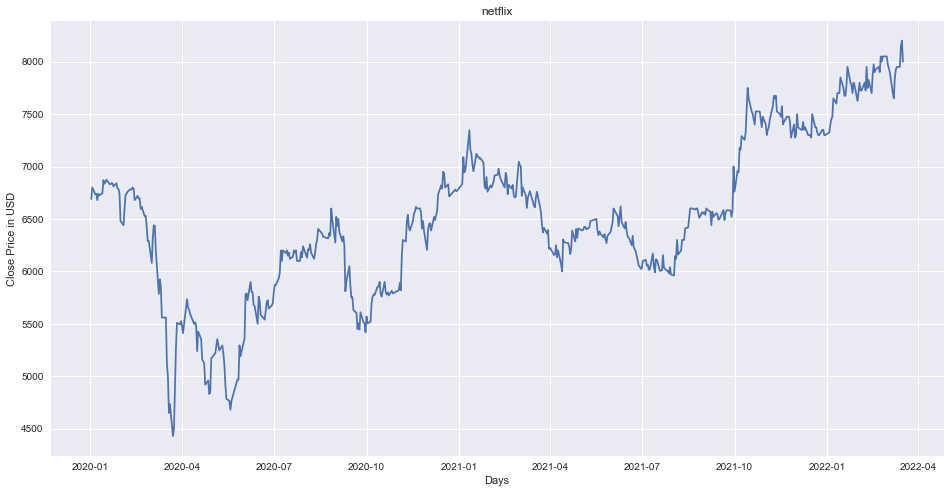

In [5]:
#visualize
plt.figure(figsize=(16,8))
plt.title('netflix')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [6]:
df = df[['Close']]
df.head(4)

,Close
Date,
2020-01-02,6690.0
2020-01-03,6800.0
2020-01-06,6735.0
2020-01-07,6740.0


In [7]:
future_days=60
#create target column
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
Date,,
2022-03-14,7950.0,NaN
2022-03-15,8150.0,NaN
2022-03-16,8200.0,NaN
2022-03-17,8000.0,NaN


In [8]:
#future data set
X=np.array(df.drop(['Prediction'],1))[:-future_days]
#print(X)

[[6690.]
 [6800.]
 [6735.]
 [6740.]
 [6680.]
 [6740.]
 [6725.]
 [6745.]
 [6870.]
 [6835.]
 [6850.]
 [6875.]
 [6835.]
 [6830.]
 [6840.]
 [6840.]
 [6810.]
 [6840.]
 [6790.]
 [6785.]
 [6740.]
 [6480.]
 [6440.]
 [6600.]
 [6730.]
 [6740.]
 [6760.]
 [6785.]
 [6780.]
 [6800.]
 [6790.]
 [6680.]
 [6720.]
 [6695.]
 [6695.]
 [6595.]
 [6615.]
 [6525.]
 [6530.]
 [6420.]
 [6290.]
 [6290.]
 [6080.]
 [6320.]
 [6440.]
 [6435.]
 [6200.]
 [5785.]
 [5925.]
 [5850.]
 [5560.]
 [5560.]
 [5560.]
 [5120.]
 [5000.]
 [4650.]
 [4735.]
 [4430.]
 [4500.]
 [5280.]
 [5510.]
 [5495.]
 [5525.]
 [5480.]
 [5410.]
 [5495.]
 [5735.]
 [5655.]
 [5635.]
 [5595.]
 [5500.]
 [5515.]
 [5485.]
 [5240.]
 [5425.]
 [5355.]
 [5160.]
 [5145.]
 [5120.]
 [4920.]
 [4960.]
 [4830.]
 [4850.]
 [5170.]
 [5220.]
 [5285.]
 [5355.]
 [5245.]
 [5295.]
 [5220.]
 [5110.]
 [4920.]
 [4785.]
 [4765.]
 [4680.]
 [4765.]
 [4970.]
 [4965.]
 [5295.]
 [5190.]
 [5360.]
 [5780.]
 [5790.]
 [5725.]
 [5900.]
 [5805.]
 [5800.]
 [5680.]
 [5670.]
 [5500.]
 [5760.]
 

C:\Users\soero\AppData\Local\Temp/ipykernel_4008/1794972844.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(df.drop(['Prediction'],1))[:-future_days]


In [9]:
y= np.array(df['Prediction'])[:-future_days]
#print(y)

In [10]:
#split train dan test
x_train, x_test, y_train,y_test =train_test_split(X,y,test_size=0.25)


In [11]:
#create the models LR dan TR
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [12]:
x_future= df.drop(['Prediction'],1)[:-future_days]
x_future= np.array(x_future.tail(future_days))
#x_future


C:\Users\soero\AppData\Local\Temp/ipykernel_4008/525608342.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future= df.drop(['Prediction'],1)[:-future_days]


In [13]:
tree_prediction= tree.predict(x_future)
#print(tree_prediction)
#print()
lr_prediction=lr.predict(x_future)
#print(lr_prediction)


C:\Users\soero\AppData\Local\Temp/ipykernel_4008/3602116964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


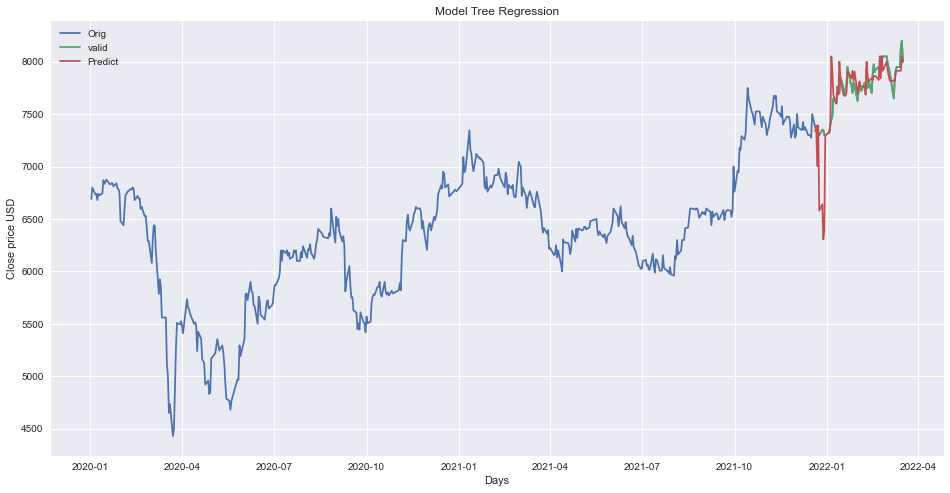

In [14]:
#visualize data
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model Tree Regression')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','valid','Predict'])
plt.show()

C:\Users\soero\AppData\Local\Temp/ipykernel_4008/3975025743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


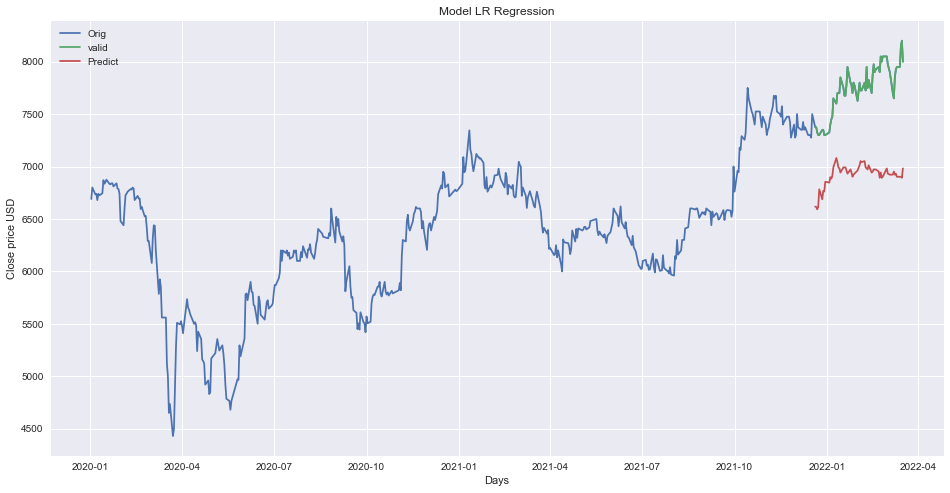

In [15]:
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model LR Regression')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','valid','Predict'])
plt.show()